In [3]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def g(x):
    if x <= 0.25 or x >=0.75:
        return 0.0
    else:
        return math.exp(1/((x - 0.25)*(x - 0.75)))/math.exp(-4/(0.75 - 0.25)**2)

def f(x):
    return [0.0 if elem <= 0.25 or elem >= 0.75 else np.exp(1/((elem - 0.25)*(elem - 0.75)))/np.exp(-4/(0.75 - 0.25)**2) for elem in x]

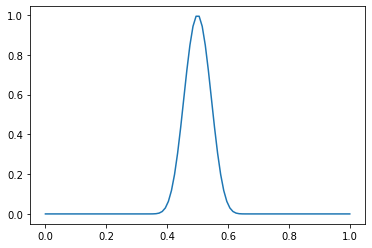

In [5]:
y = np.linspace(0, 1, 100)
plt.plot(y, f(y))

In [6]:
h = lambda x: 1 + quad(g, 0, x)[0]

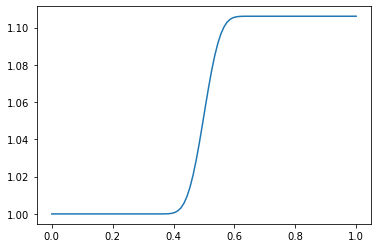

In [7]:
plt.plot(y, [h(i) for i in y])